In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cancer = load_breast_cancer()
# cancer

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
type(cancer)

sklearn.utils.Bunch

In [5]:
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names,
                 )
df.head() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
len(df.columns.to_list()) # n_cols

30

In [7]:
df['class'] = cancer.target
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
class                      0
dtype: int64

In [8]:
mr = df['mean radius']
df['mean radius'].describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: mean radius, dtype: float64

high outlier : 21.9


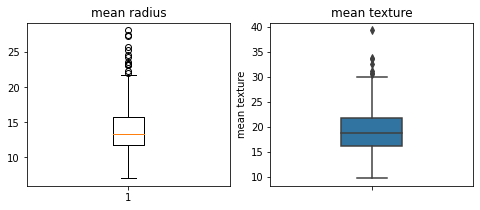

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,3))
ax1.set_title('mean radius')
ax1.boxplot(df['mean radius']) # see outlier
ho = mr.quantile(.75) +  1.5 * (mr.quantile(.75) - mr.quantile(.25))
print('high outlier : {}'.format(ho))

mt = 'mean texture'
ax2.set_title(mt)
# ax2.boxplot(df[mt])
sns.boxplot(y=df[mt], width=.3)
plt.show()

In [10]:
df.shape

(569, 31)

In [11]:
df = df[df['mean radius'] < 21.9] # cut all outliers
df = df[df['mean texture'] < 38] # cut some outliers
df.shape

(554, 31)

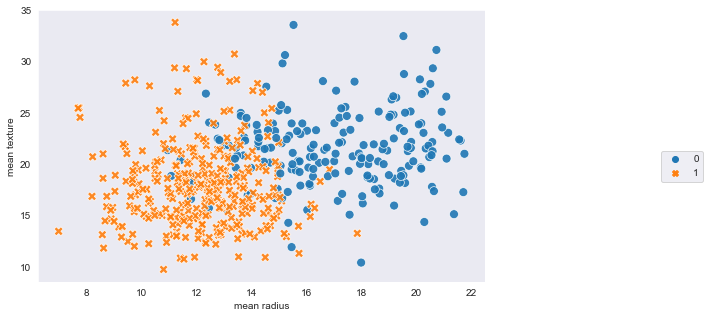

In [12]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))

sns.scatterplot(x='mean radius', y='mean texture', data=df, 
               hue='class', style='class', alpha=.9,
               s=80, edgecolor='w')
plt.grid(False)
plt.legend(bbox_to_anchor=(1.5,0.5 ))
plt.show()

# Best case *True prediction 100%*

In [13]:
# seperate cluster of data to super far
df['mean radius_'] = np.where(
    df['class']==0, df['mean radius']+7.5, df['mean radius'] # shift blue groups to left 
)
df['mean radius_'].head(3)

0    25.49
1    28.07
2    27.19
Name: mean radius_, dtype: float64

#### Viz

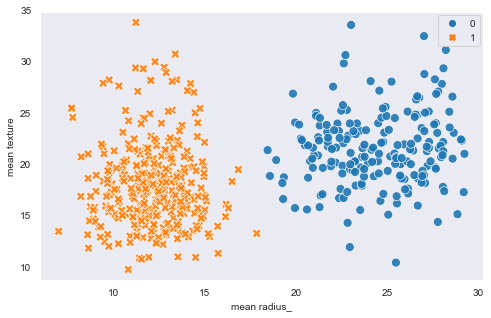

In [14]:
plt.figure(figsize=(8,5))
# plt.rcParams['axes.edgecolor'] = '#cc00aa'
plt.rcParams['axes.linewidth'] = 5
sns.scatterplot(x='mean radius_', y='mean texture',
               data=df, hue='class', style='class',
               alpha=.9, edgecolor='w', s=80)
plt.grid(False)
plt.legend()
plt.show()

<Figure size 576x360 with 0 Axes>

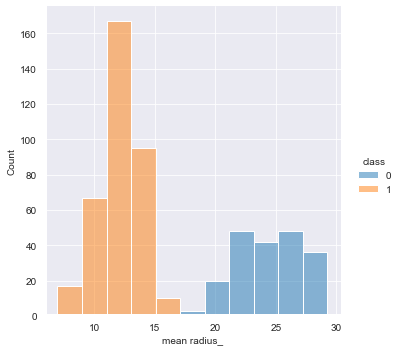

In [15]:
plt.figure(figsize=(8,5))
# sns.displot(df['mean radius_'][df['class']==0],
#            label='0', color='b')
# sns.displot(df['mean radius_'][df['class']==1], label='1', 
#            color='r')
sns.displot(data=df, x='mean radius_', hue='class', kind='hist',
           legend='class')
# plt.legend()

plt.show()

In [16]:
cols = ['mean radius_', 'mean texture']
X = df[cols]
y = df['class']
X.shape, y.shape, y.unique()

((554, 2), (554,), array([0, 1]))

In [17]:
X[:3]

,mean radius_,mean texture
0,25.49,10.38
1,28.07,17.77
2,27.19,21.25


# Split data

Score : 1.000000
              precision    recall  f1-score   support

          No       1.00      1.00      1.00        61
         Yes       1.00      1.00      1.00       106

    accuracy                           1.00       167
   macro avg       1.00      1.00      1.00       167
weighted avg       1.00      1.00      1.00       167



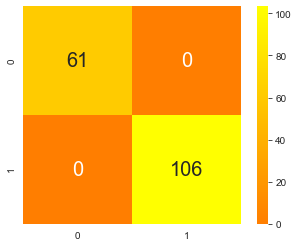

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,
                                                   random_state=10)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
print('Score : {:3f}'.format(model.score(X_test, y_test))) # 100% prediction

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, annot_kws={'fontsize':20},
           cmap='autumn', robust=True, square=True, 
           center=True, fmt='.8g', )
plt.show()

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

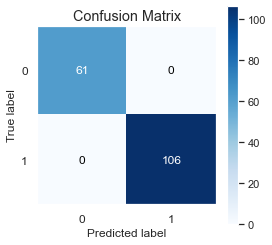

In [19]:
import scikitplot as skplot
sns.set(rc={'figure.figsize':(4,4)})
skplot.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

### CV

In [20]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(model, X, y, cv=10)
print('cvs : {}'.format(cvs.round(2)))
print('Mean score : %.2f' %(cvs.mean().round(2) * 100))

cvs : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean score : 100.00


# ROC

In [21]:
y_pred_prob = model.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(
y_test, y_pred_prob[:,1])
y_pred_prob[:10].round(3)

array([[0.   , 1.   ],
       [0.   , 1.   ],
       [0.002, 0.998],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.008, 0.992],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ]])

In [22]:
df_result = pd.DataFrame(y_test)
df_result['y_pred'] = y_pred
df_result['y_pred_prob_0'] = y_pred_prob[:,0] # prob of neg
df_result['y_pred_prob_1'] = y_pred_prob[:,1] # prob of pos
df_result.head().round(3)

,class,y_pred,y_pred_prob_0,y_pred_prob_1
497,1,1,0.000,1.000
399,1,1,0.000,1.000
235,1,1,0.002,0.998
400,0,0,1.000,0.000
424,1,1,0.000,1.000


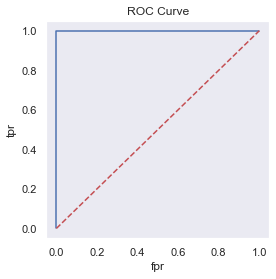

In [23]:
from sklearn.metrics import roc_curve, auc

ll = lower_left = [0,1]
ur = [0,1]

plt.figure(figsize=(4,4))
y_pred_prob = model.predict_proba(X_test)
plt.plot(fpr, tpr)
plt.plot(ll,ur, '--r') #-- + red
plt.title('ROC Curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.grid(False)
plt.show()

In [24]:
auc(fpr, tpr) # get Area under curve 1*1 = 1

1.0